Author: Velibor Zeli

This document is released under a common license, allowing for broad usage and distribution.

# Fair-Price Models for Loans

Fair-price models for annuity loans quantify the **relationship between the cost of borrowing and interest rates**. As interest rates increase, it becomes more difficult to service the interest and repay a mortgage. Consequently, all else being equal, borrowers take out loans with a smaller principal to compensate for higher interest rates. This, in turn, can have an impact on the housing market, potentially leading to lower housing prices.

### Motivation

Annuity loans are a popular debt instrument widely used to finance housing purchases. These loans provide liquidity to the housing market, and abundance of cheap capital with low interest rates has resulted in higher housing costs.

Consider the following figure

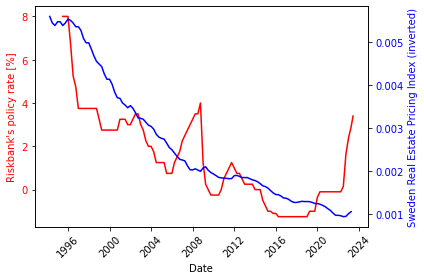

In [1]:
from src.plotting import plot_interest_rate_vs_home_prices

plot_interest_rate_vs_home_prices()

Assuming a causal relationship between these factors, the above figures shows that lower interest rates provide access to cheap capital and lead to an increase in housing prices. Therefore, it is reasonable to expect that increasing interest rates would have the opposite effect on the housing prices.

After maintaining a loose interest rate policy with negative policy rate (Swe., styrräntan) since 2015, Riksbanken shifted its stance and began aggressively increasing the policy rate in early 2022. This decision directly impacted STIBOR as well as the interest rates charged by banks for annuity loans.

---

### Annuity Loans (Swe., annuitetslån) - Matching-Times Model

The total cost of borrowing, denoted by $\Sigma$, for an annuity loan is defined as

$$ \Sigma = A \, T, \qquad (1) $$

where $T$ is the duration of the loan in months, and $A$ is the fixed monthly payment that consists of interest rate payment and principal repayment. Monthly payment is calculated based on the loan contract parameters as

$$ A = p \frac{r}{1 - \left( \frac{1}{1 + r} \right)^T}, \qquad (2a)$$

where $p$ is the loan principal, $r$ is the monthly interest rate.

Solving $(2a)$ for the loan term gives

$$ T = \frac{\ln\left(1 - r \frac{p}{A} \right)}{\ln\left( \frac{1}{1+r} \right)}. \qquad (2b) $$

We introduce two key terms that are used in determining the repayment duration for housing:

* $\Sigma$ - total cost of borrowing, encompassing the principal amount borrowed and the associated interest

* $\sigma$ - portion of income allocated towards housing expenses

Together, these terms establish the time scale $t$, which represents the number of years required to fully repay the initial principal and interest for housing

$$ \frac{\Sigma}{\sigma} \equiv t. \qquad (3a) $$

Depending on the location of the housing, borrowers with mortgages may exhibit different values of $ t $. $(3a)$ implies that $t$ is equivalent to the loan duration $T$ and leads to:

$$ \frac{\Sigma}{\sigma} = T. \qquad (3b) $$

>_There exists a time scale $T$ that represents the duration required to pay off a mortgage. Depending on the location of the housing, borrowers with mortgages may exhibit different values of $T$. Equation $(3b)$ implies that $T$ is influenced by a delicate balance between various markets: the labor market, the financial market, and the housing market. Specifically, $T$ is shaped by factors such as monthly income in the labor market, prevailing interest rates in the financial market, and the initial loan principal in the housing market. These interconnected market dynamics contribute to the determination of $T$, reflecting the complexity involved in the repayment process._

This means that we can equate

$$ T_1 = T_2, $$

implying that homebuyers repay their homes after the same amount of time under different economic circumstances. By substituting $(2b)$ into the above equality, we can solve for $p_2$

$$ p_2 = \frac{A_2}{r_2} \left[ 1 - \left( 1 - r_1 \frac{p_1}{A_1} \right)^{ \frac{\ln\left( \frac{1}{1 + r_2} \right)}{\ln\left( \frac{1}{1 + r_1} \right)} } \right]. \qquad (4) $$

Finally, the only unknown is $A$, which can be determined by substituting (1) into (3b)

$$ A = \sigma .$$

Here, $\sigma$ represents the monthly portion of income allocated for housing and is modelled as

$$ A = \sigma = \frac{s (1 - \tau) \,}{12} \delta, \qquad (5) $$

where $s$ denotes the annual bruto income, $\tau$ represents the income tax rate, and $\delta$ indicates the fraction of $s$ allocated for housing.

---

#### Example 1A

Consider an economy with an income tax rate of 30%. A borrower with an annual bruto income of 500,000 SEK intends to take an **annuity loan** for 2,000,000 SEK at an annaul interest rate of 1.5% and is willing to allocate 50% of her income to service the loan. She anticipates a change in the annual interest rate to 5% in 1.5 years. Meanwhile, her annual salary has increased by 2%. She seeks to determine the equivalent principal $p_2$ for the previous loan under the new circumstances.

Parameters for the loan at $t_1$:

* `tau = 0.30`
* `p1 = 2_000_000`
* `r1 = 0.015`
* `s1 = 500_000`
* `delta = 0.50`
* `r2 = 0.05`
* `gamma = 0.02`
* `s2 = 500_000 * (1 + gamma)`

In [2]:
gamma, tau, delta = 0.02, 0.30, 0.50
tau1, tau2 = tau, tau
p1, r1, s1 = 2_000_000, 0.015, 500_000
r2, s2 = 0.050, 500_000 * (1 + gamma)

In [3]:
A1 = s1 * (1 - tau) * delta / 12
print(f"Monthly payment at t1: {round(A1, -2):,.2f} SEK")

Monthly payment at t1: 14,600.00 SEK


In [4]:
A2 = s1 * (1 + gamma) * (1 - tau) * delta / 12
print(f"Monthly payment at t2: {round(A2, -2):,.2f} SEK")

Monthly payment at t2: 14,900.00 SEK


In [5]:
from src.fair_price_model import annuity_matching_T

p2 = annuity_matching_T(p1, s1, r1, r2, tau1, tau2, delta, gamma)
print(f"Equivalent principal: {p2:,.2f} SEK")

Equivalent principal: 1,660,891.75 SEK


In [6]:
print(f"Equivalent principal: {(p2 - p1)/p1:.2%} SEK")

Equivalent principal: -16.96% SEK


---

### Amortized Loans (Swe., rak amortering) - Matching-Times Model

Unlike annuity loans, where the monthly payments remain fixed until the loan is fully repaid, amortized loans and interest charge on the remaining principal. The nominal value of the amortization remains constant, while the interest gradually decreases until the loan is completely paid off. Amortized loans are a widely preferred financial product for mortgages in Sweden. This makes the fair-price model using amortized loans more suitable for modeling the Swedish housing market.

Fair-price model for amortized loans is derived in similar way as for annuity loans. The total cost for borrowing is defined as

$$\Sigma = \sum_{t = 1}^{T_p} A + \left[ p - A \, (t - 1) \right] \, r , \qquad (6) $$

where the first term in the sum is the amortization (i.e., repayment of the principal), the second term is the sum of interest payment and $T_p$ is the natural number of months needed to pay off the loan 

$$T_p = \frac{p}{A}.$$

Note that the interest rate for the first payment is payed on the whole principal amount and thus the compensation in the second term. 

Expanding (6) and switching the counter in the second term for the interest rate payemnts gives

$$\Sigma = A \sum_{t=1}^{T_p} 1 + p\,r \sum_{t=1}^{T_p} 1 - A\,r \sum_{t=0}^{T_p - 1} t, $$

using $p = A \, T_p$ together with the simple sum rule for the first two terms and the [arithmetic progression](https://en.wikipedia.org/wiki/Arithmetic_progression#Sum) for the last term gives

$$ \Sigma = p + r \, T_p \, p - r \,  T_p \, A \frac{T_p - 1}{2}. \qquad (7) $$

The total cost of borrowing can be rewritten in terms of the time required to repay the total cost of borrowing given the amortization in (5)

$$
\begin{align}
\hat T &= \frac{\Sigma}{A} \notag \\
&= T_p + r \, {T_p}^2 - r \, T_p \frac{T_p - 1}{2}, \notag
\end{align}
$$

and can be finally simpliefied to

$$ \hat T = T_p + r \, T_p \frac{1 + T_p}{2}. \qquad (8)$$

The total time required to repay the loan is the sum of time required to repay the principal and interest. Interestingly, the time required to repay the interest, the second term in (8), is a quadratic function of time required to repay the principal.

To find a fair-price model, we equate the time required to repay the total cost of borrowing, under different interest rate environments

$$\hat T_1 = \hat T_2, \qquad (9) $$

where the indices 1 and 2 represent the lower rate regime and the higher rate regime, respectively. Substituting (8) into (9) and simplifying gives 

$$ \frac{r_2}{2} {{T_p}_2}^2 + \left( 1 + \frac{r_2}{2} \right) {T_p}_2 - {T_p}_1 \left( 1 + \frac{r_1}{2} (1 + {T_p}_1) \right) = 0, \qquad (10) $$

where all terms are known except for ${T_p}_2$.

Finally, after solving the quadratic equation and finding the true solution for ${T_p}_2$ we find

$$ p_2 = A_2 {T_p}_2, $$

which represents the equivalent principal in the regime with new rates.

---

#### Example 1B

Considering the problem description given in **Example 1A** and find the equivalent principal $p_2$ for an **amortized loan**. 

In [7]:
gamma, tau, delta = 0.02, 0.30, 0.50
tau1, tau2 = tau, tau
p1, r1, s1 = 2_000_000, 0.015, 500_000
r2, s2 = 0.050, 500_000 * (1 + gamma)

In [8]:
A1 = s1 * (1 - tau) * delta / 12
print(f"Monthly payment at t1: {round(A1, -2):,.2f} SEK")

Monthly payment at t1: 14,600.00 SEK


In [9]:
A2 = s1 * (1 + gamma) * (1 - tau) * delta / 12
print(f"Monthly payment at t2: {round(A2, -2):,.2f} SEK")

Monthly payment at t2: 14,900.00 SEK


In [10]:
from src.fair_price_model import amortized_matching_T

p2 = amortized_matching_T(p1, s1, r1, r2, tau1, tau2, delta, gamma)
print(f"Equivalent principal: {p2:,.2f} SEK")

Equivalent principal: 1,772,444.98 SEK


In [11]:
print(f"Equivalent principal: {(p2 - p1)/p1:.2%} SEK")

Equivalent principal: -11.38% SEK


---

### Correction for Downpayment

The housing value is determined as

$$ \Pi_1 = p_1 + \Delta \Pi_1, \qquad (11) $$

where $p_1 = p_1(r_1, p_1, A)$ is the value of the original principal and $\Delta$ denotes the downpayment size, (i.e., fraction of the house value paid in cash). When interest rates increase, the present value of the loan principal decreases $p_2=p_2(r_2, p_2, A)$, but the original downpayment retains its value and increases in relative terms. Thus, the new housing value is

$$
\begin{align}
\Pi_2 &= p_2 + \Delta \Pi_2 \notag \\
&= p_2 + \Delta \frac{p_1}{1 - \Delta}. \notag
\end{align}
$$

The relative change of the housing value is

$$\frac{\Pi_2 - \Pi_1}{\Pi_1} = \frac{p_2 - p_1}{p_1 + \Delta \Pi_1}.$$

The above equation can be expressed in terms of the value of loan principal by solving for $Pi_1$ in (11) and substituting

$$\frac{\Pi_2 - \Pi_1}{\Pi_1} = \frac{p_2 - p_1}{p_1} (1 - \Delta).$$

#### Example 2

What is the price change of a house where the original loan principal is 2,000,000 SEK and the present value of the loan principal is 1,770,000 SEK. Consider an economy where the downpayment is 15%.

In [12]:
p1, p2, d = 2_000_000, 1_770_000, 0.15

In [13]:
Pi1 = p1 / (1 - d)
print(f"House value at t1: {round(Pi1, -2):,.2f} SEK")

House value at t1: 2,352,900.00 SEK


In [14]:
Pi2 = p2 + d * Pi1
print(f"House value at t2: {round(Pi2, -2):,.2f} SEK")

House value at t2: 2,122,900.00 SEK


In [15]:
print(f"d(Home)/Home: {(Pi2 - Pi1) / Pi1:.2%}")

d(Home)/Home: -9.77%


In [16]:
print(f"d(Principal)/Principal: {(p2 - p1) / p1:.2%}")

d(Principal)/Principal: -11.50%


#### Discussion:

In hiking cycles, when interest rates are increasing, the present value of the loan principal tends to decrease, which leads to a decline in the housing market. As a fixed amount, the downpayment retains its worth and acts as a form of savings for the homebuyer. Its relative size increases compared to the reduced loan principal, which effectively softens the impact of rising interest rates on the overall housing market. By serving as a cushion, the downpayment helps stabilize the market and reduces the potential drop in housing values during periods of increasing interest rates.

---

#### Example 3A

For the parameters given in **Example 1A** calculate the relative change of equivalent principal $p_2$ compared to $p_1$ for a range of borrowers with different *ANNUITY LOAN* sizes $\rho = p_1/s_1 \in [2, 5.5]$ and fractions allocated to repaying the debt $\delta \in [0.25, 1]$. Consider an economy where the downpayment is 15%.

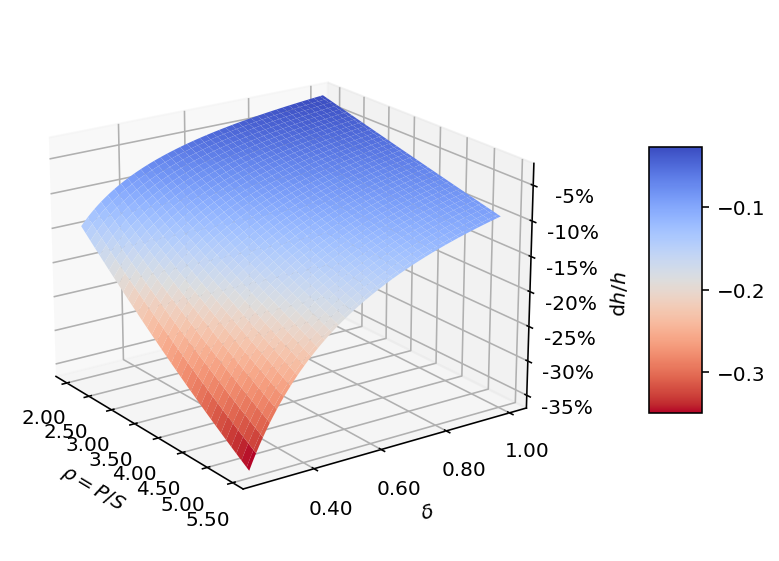

In [17]:
%config InlineBackend.figure_format = 'retina'
import numpy as np

from src.plotting import plot_annuity_matching_T

gamma, tau1, tau2, deltas, d = 0.02, 0.30, 0.30, np.arange(0.25, 1.01, 0.01), 0.15
p1, r1, rhos = 2_000_000, 0.015, np.arange(2, 5.5, 0.05)
r2, s2 = 0.050, 500_000 * (1 + gamma)

plot_annuity_matching_T(p1, rhos, r1, r2, tau1, tau2, deltas, gamma, d)

#### Example 3B

For the parameters given in **Example 1A** calculate the relative change of equivalent principal $p_2$ compared to $p_1$ for a range of borrowers with different *AMORTIZED LOAN* sizes $\rho = p_1/s_1 \in [2, 5.5]$ and fractions allocated to repaying the debt $\delta \in [0.25, 1]$. Consider an economy where the downpayment is 15%.

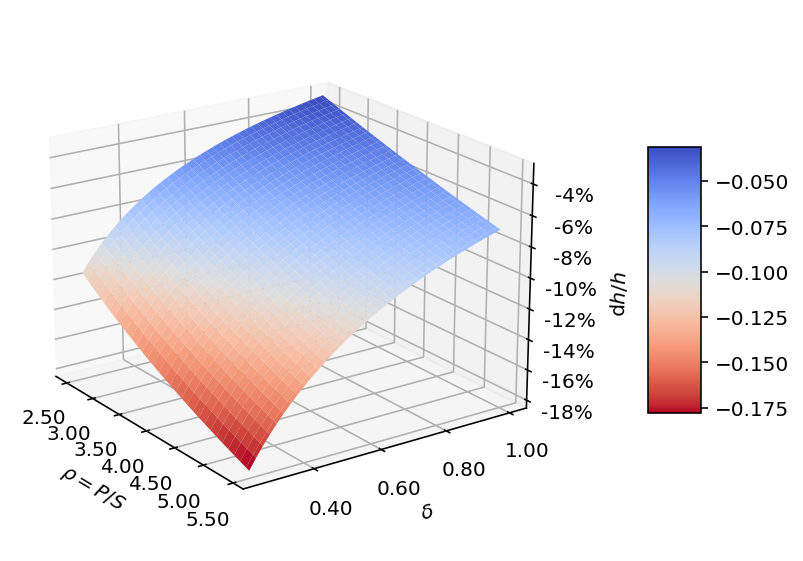

In [18]:
%config InlineBackend.figure_format = 'retina'
import numpy as np

from src.plotting import plot_amortized_matching_T

gamma, tau1, tau2, deltas, d = 0.02, 0.30, 0.30, np.arange(0.25, 1.01, 0.01), 0.15
p1, r1, rhos = 2_000_000, 0.015, np.arange(2.5, 5.5, 0.05)
r2, s2 = 0.050, 500_000 * (1 + gamma)

plot_amortized_matching_T(p1, rhos, r1, r2, tau1, tau2, deltas, gamma, d)